In [1]:
conda install -c conda-forge opencv

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\anaconda3

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       h56e8100_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    eigen-3.4.0                |       h2d74725_0         1.2 MB  conda-forge
    ffmpeg-4.2.3               |       ha925a31_0        23.2 MB  conda-forge
    opencv-4.6.0               |  py311heda8569_3        24.8 MB
    ------------------------------------------------------------
                                           Total:        49.5 MB

The following NEW packages will be INSTALLED:

  eigen              conda-forge/win-64::eigen-3.4.0-h2d74725_0 
  ffmpeg             conda-forge/win-64::ffmpeg-4.2.3-ha925a31_0 
  opencv             p

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/ma

# Loading Image

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [3]:
#Loading Image
image = Image.open("C:/Users/HP/Desktop/licensed-image.jpg")
img_array = np.array(image)

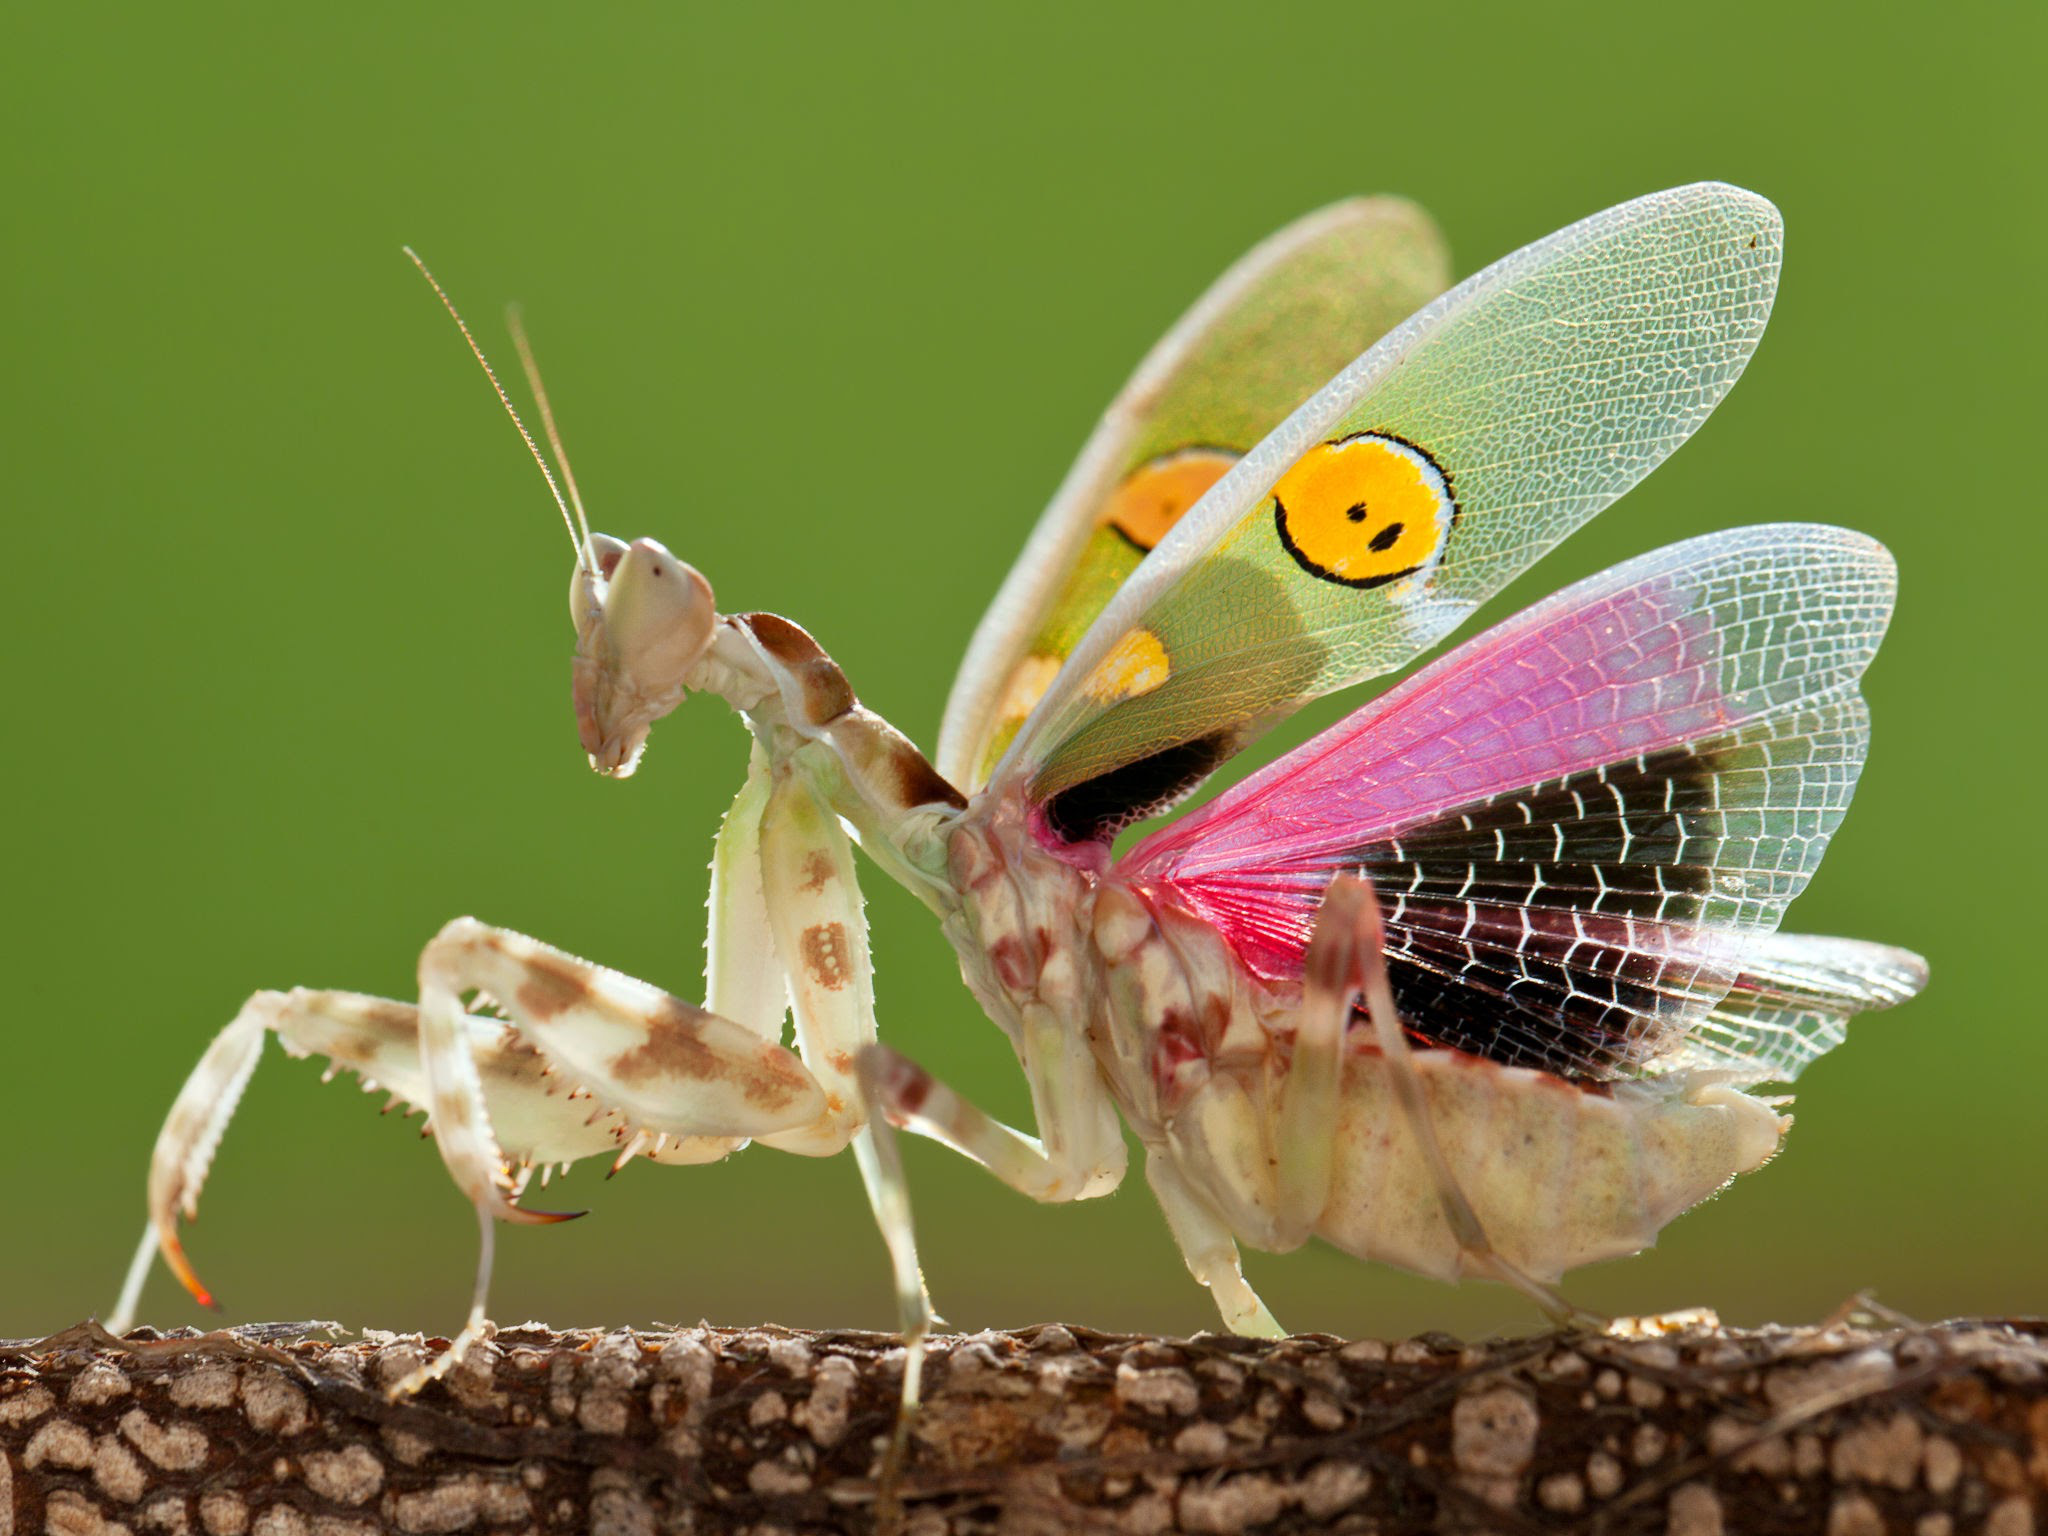

In [4]:
#displaying Image
display(image)

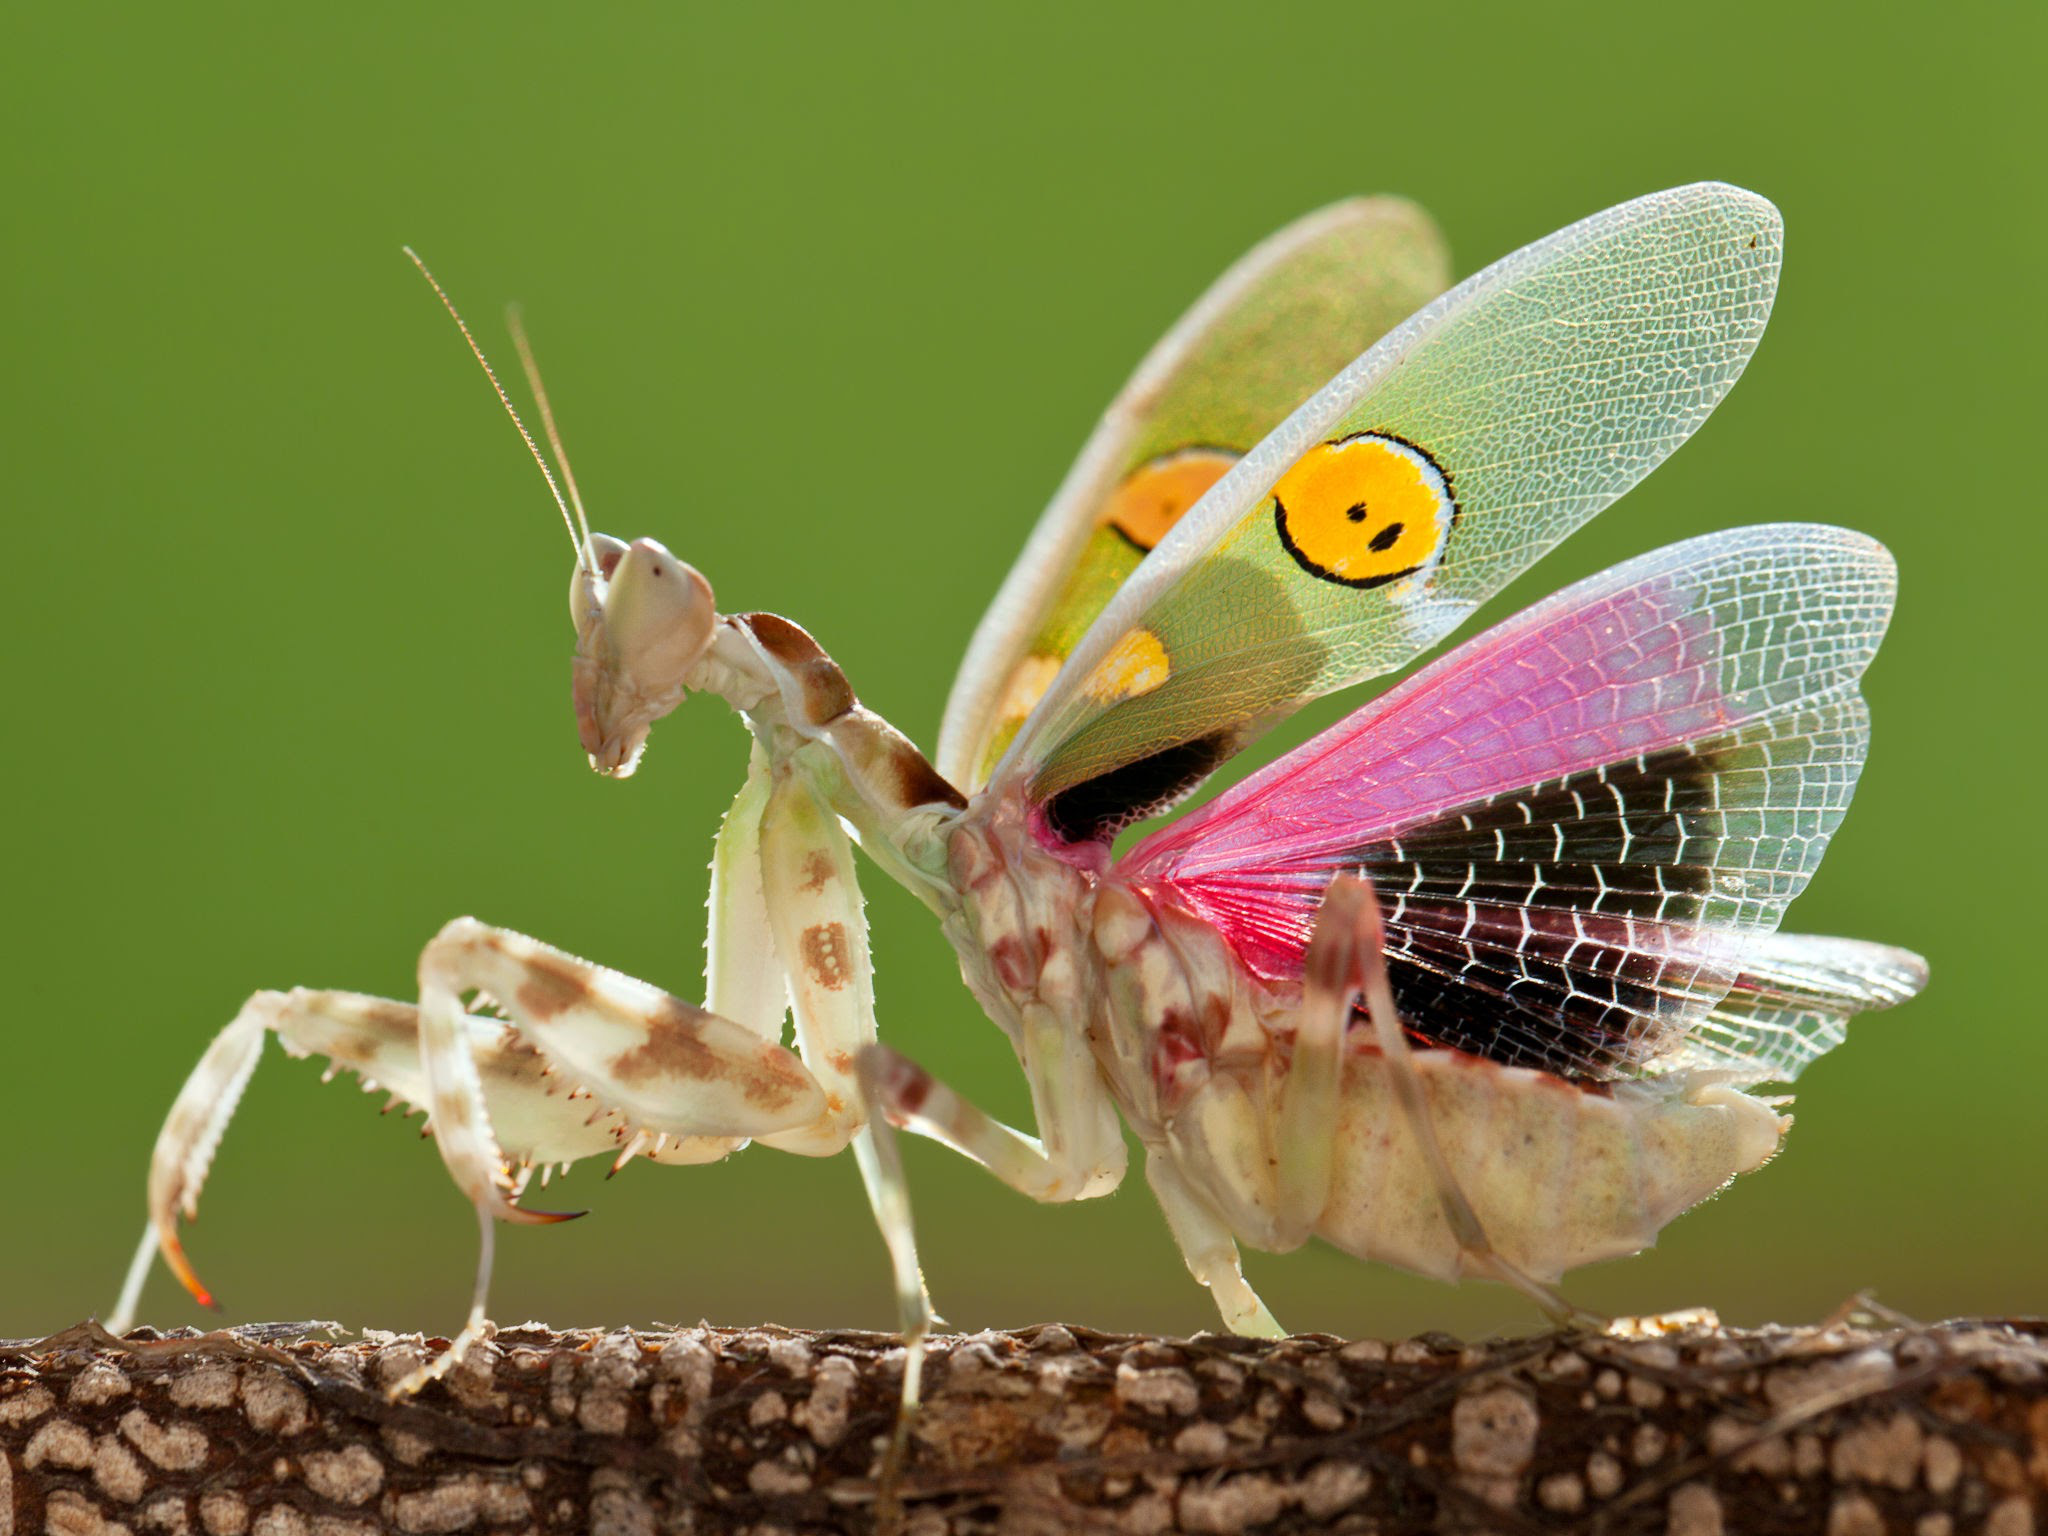

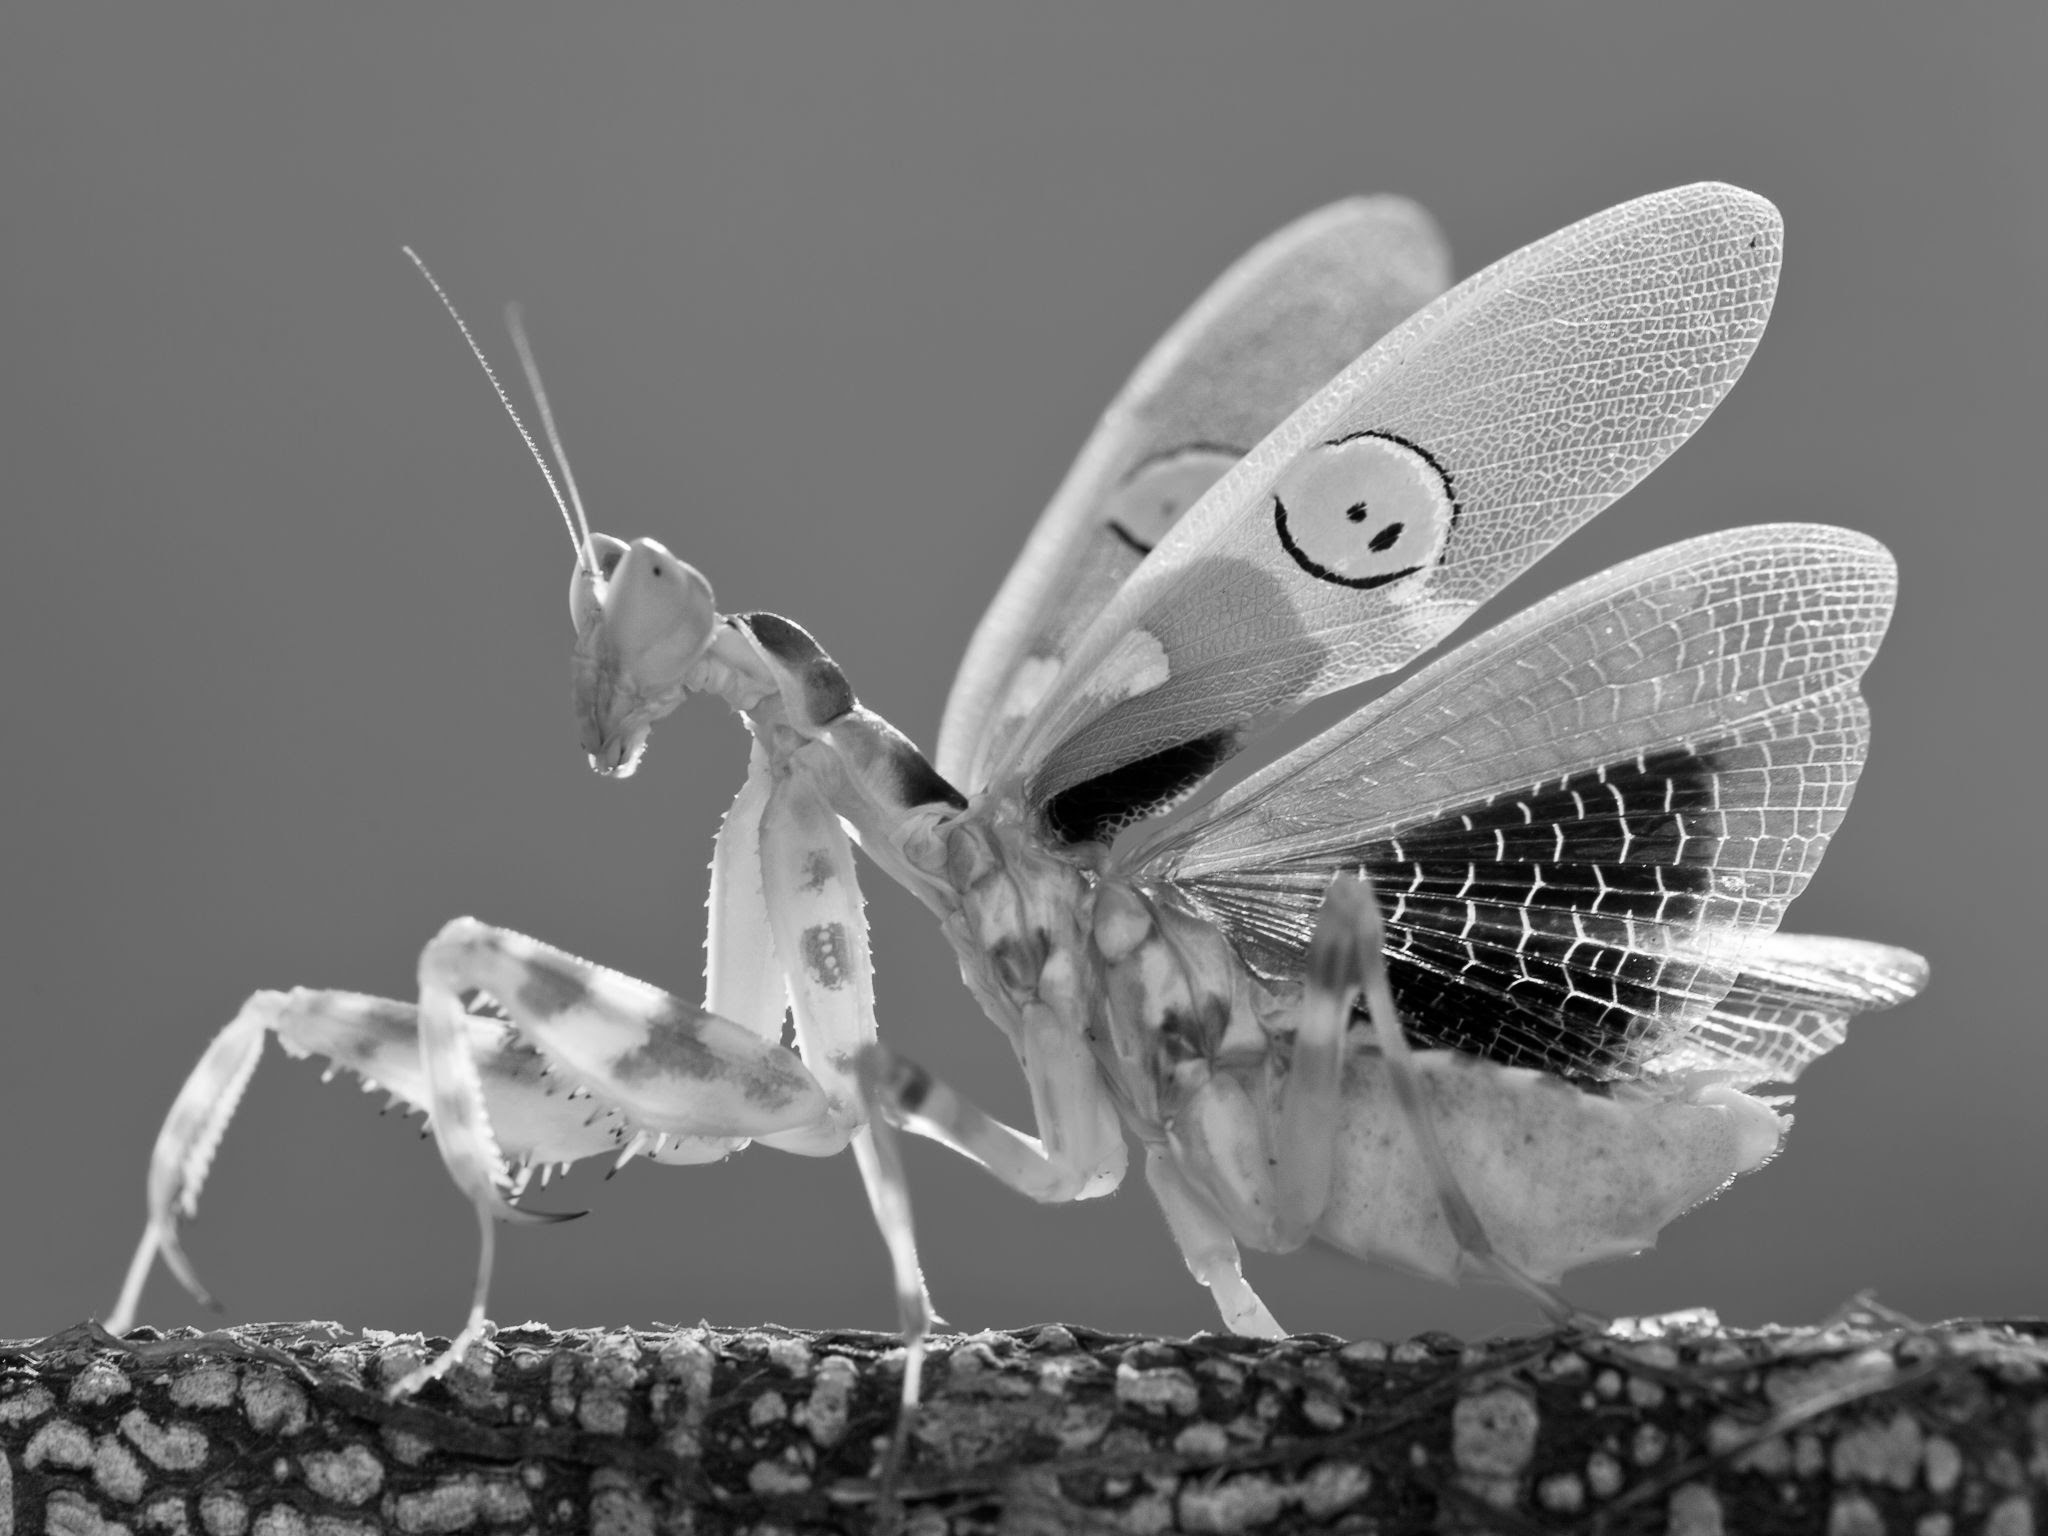

In [5]:
# converting image into greyscale image
grey_img = image.convert('L')

display(image,grey_img)

# Canny image

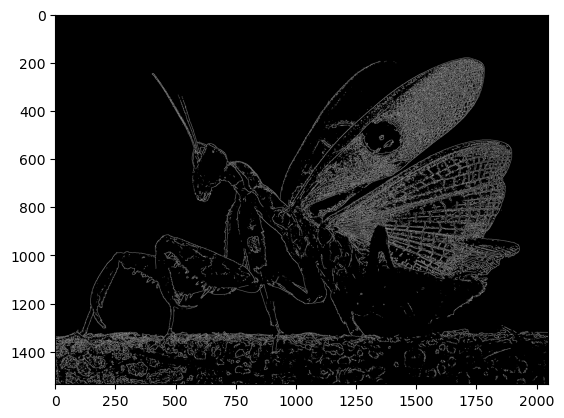

In [6]:
#creating edge image
edges = cv.Canny(img_array,100,100) # (image array,threshold 1, threshold 2)
plt.imshow(edges,cmap = 'gray')
plt.show()

## Histogram Of Brightness

In [7]:
red = img_array[:,:,0].flatten()
green = img_array[:,:,1].flatten()
blue = img_array[:,:,2].flatten()

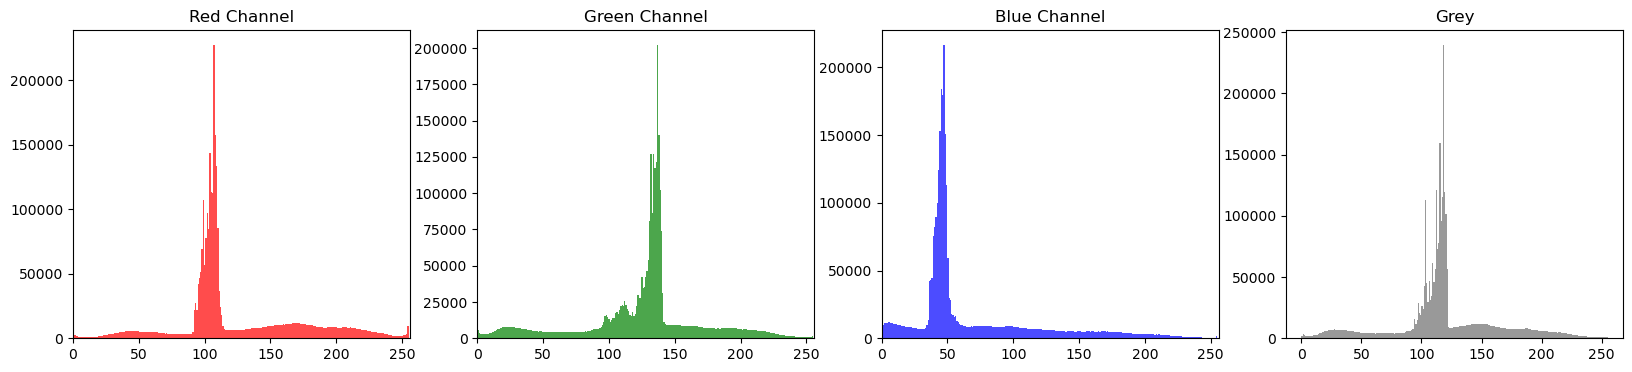

In [23]:
plt.figure(figsize=(20, 4))

#Red Channel
plt.subplot(1, 4, 1)
plt.hist(red, bins=256, color='red' , alpha=.7)
plt.title('Red Channel')
plt.xlim([0, 256])

#Blue Channel
plt.subplot(1, 4, 2)
plt.hist(green, bins=256, color='green',alpha=.7)
plt.title('Green Channel')
plt.xlim([0, 256])

#Blue Channel
plt.subplot(1, 4, 3)
plt.hist(blue, bins=256, color='blue' , alpha=.7)
plt.title('Blue Channel')
plt.xlim([0, 256])

plt.subplot(1, 4, 4)
plt.hist(image_gray.flatten(), bins=255, color="black", alpha=0.4)
plt.title("Grey")
plt.show()

# From Matplotlib

In [10]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [13]:
img = mpimg.imread("C:/Users/HP/Desktop/licensed-image.jpg")

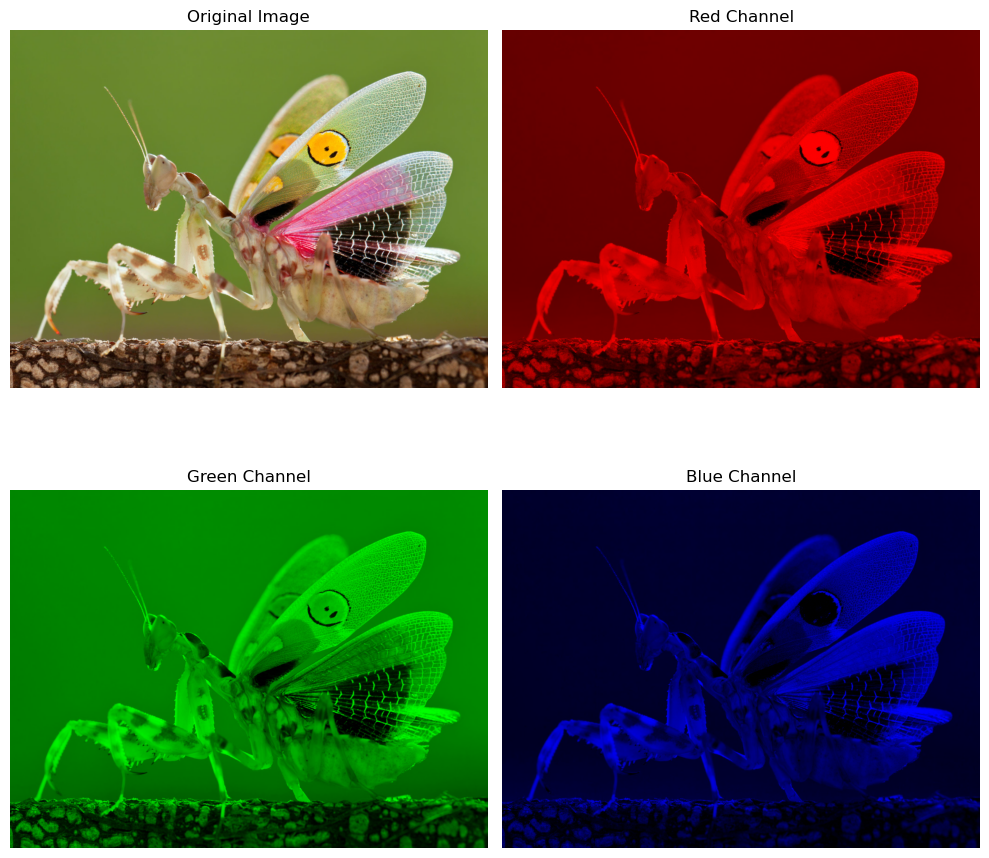

In [14]:
if img.ndim == 1:
    raise ValueError('The image data is one-dimensional. Please check the image file and loading process.')
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Original image
axs[0, 0].imshow(img)
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

# Red Channel
red_channel = img.copy()
red_channel[:, :, 1] = 0
red_channel[:, :, 2] = 0
axs[0, 1].imshow(red_channel)
axs[0, 1].axis('off')
axs[0, 1].set_title('Red Channel')

# Green Channel
green_channel = img.copy()
green_channel[:, :, 0] = 0
green_channel[:, :, 2] = 0
axs[1, 0].imshow(green_channel)
axs[1, 0].axis('off')
axs[1, 0].set_title('Green Channel')

# Blue Channel
blue_channel = img.copy()
blue_channel[:, :, 0] = 0
blue_channel[:, :, 1] = 0
axs[1, 1].imshow(blue_channel)
axs[1, 1].axis('off')
axs[1, 1].set_title('Blue Channel')

plt.tight_layout()
plt.show()


# Noise Reduction with Median Filtering

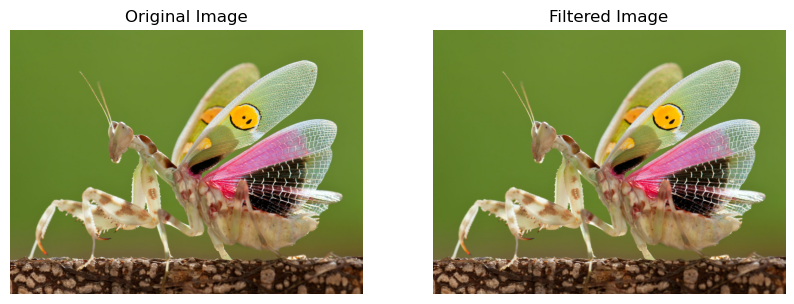

In [17]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread("C:/Users/HP/Desktop/licensed-image.jpg")  

# Convert image to RGB 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply median filter
filtered_image = cv2.medianBlur(image, ksize=3)  # Adjust the ksize parameter as needed

# Display the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Filtered Image')
plt.axis('off')

plt.show()


# Feature Extraction Using Local Binary Patterns (LBP)

C:\Users\HP\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


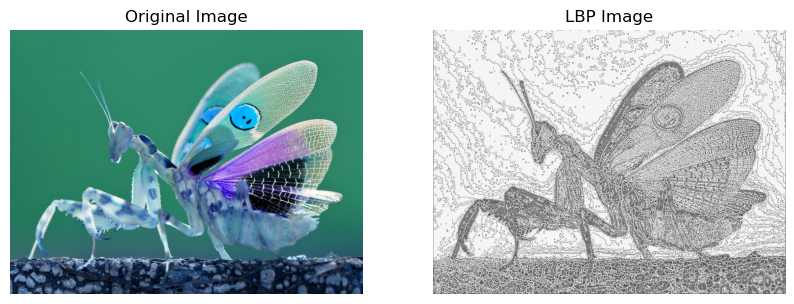

In [25]:
from skimage import feature
radius = 3
n_points = 8 * radius
lbp = feature.local_binary_pattern(image_gray, n_points, radius, method='uniform')

hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')
plt.title('LBP Image')
plt.axis('off')
plt.show()